# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [5]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

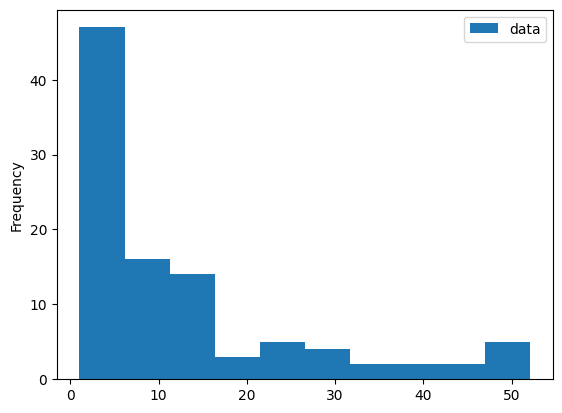

In [6]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

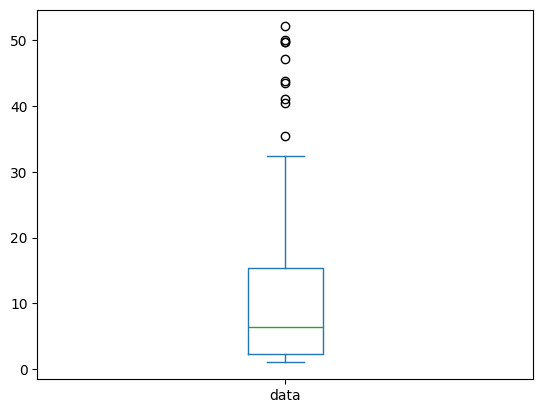

In [7]:
df.plot.box()

### Histogram vs. Boxplot: Pros and Cons

**Histogram**  
- **Pros:**  
  - Shows the distribution of drug prices across different ranges.  
  - Highlights the frequency of lower and higher-priced drugs, making it easier to spot skewness.  
- **Cons:**  
  - Less effective in showing outliers.  
  - Can be misleading if bin sizes aren’t chosen carefully.

**Boxplot**  
- **Pros:**  
  - Clearly identifies outliers, which is helpful when focusing on the more expensive drugs.  
  - Summarizes key statistics like median, quartiles, and data spread in a compact view.  
- **Cons:**  
  - Doesn’t show frequency distribution.  
  - Can be less intuitive for those unfamiliar with boxplots.

**Which to Choose?**  
For identifying how much the more expensive drugs cost in relation to others, the **boxplot** is more effective due to its focus on outliers and data spread.  

**Improvement Suggestions:**  
- **Histogram:** Use color gradients or adjust bin sizes to highlight higher price ranges.  
- **Boxplot:** Add color or annotations to highlight key stats and make it more visually engaging.


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [8]:
# 1) First, let's access the dataset

import kagglehub
import pandas as pd
import os

# Download the Austin Housing Prices dataset
path = kagglehub.dataset_download("ericpierce/austinhousingprices")

print("Path to dataset files:", path)

csv_file = os.path.join(path, "austinHousingData.csv")

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file)

df.head()


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.34G/2.34G [01:00<00:00, 41.4MB/s]

Extracting files...


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/ericpierce/austinhousingprices/versions/4


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [9]:
# 2) Let's gather some more information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [10]:
# 3) Clean the dataset

# A. Drop Irrelevant Columns
df_clean = df.drop(columns=['zpid', 'description', 'homeImage', 'latestPriceSource'])

# B. Convert 'latest_saledate' to datetime
df_clean['latest_saledate'] = pd.to_datetime(df_clean['latest_saledate'], errors='coerce')

# C. Replace 0s in critical columns (which can't be 0) with NaN
cols_with_zero_invalid = ['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt', 'lotSizeSqFt']
df_clean[cols_with_zero_invalid] = df_clean[cols_with_zero_invalid].replace(0, pd.NA)

# D. Handle Missing Data (drop or impute)
df_clean.dropna(subset=['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt'], inplace=True)

# E. Feature Engineering
df_clean['houseAge'] = 2025 - df_clean['yearBuilt']
df_clean['pricePerSqFt'] = df_clean['latestPrice'] / df_clean['livingAreaSqFt']

# F. Outlier Detection: Remove extreme price per sqft outliers
df_clean = df_clean[df_clean['pricePerSqFt'] < df_clean['pricePerSqFt'].quantile(0.99)]

# G. Final Check
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14883 entries, 0 to 15170
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   city                        14883 non-null  object        
 1   streetAddress               14883 non-null  object        
 2   zipcode                     14883 non-null  int64         
 3   latitude                    14883 non-null  float64       
 4   longitude                   14883 non-null  float64       
 5   propertyTaxRate             14883 non-null  float64       
 6   garageSpaces                14883 non-null  int64         
 7   hasAssociation              14883 non-null  bool          
 8   hasCooling                  14883 non-null  bool          
 9   hasGarage                   14883 non-null  bool          
 10  hasHeating                  14883 non-null  bool          
 11  hasSpa                      14883 non-null  bool          


,city,streetAddress,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,houseAge,pricePerSqFt
0,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,1.98,2,True,True,True,...,1,1.266667,2.666667,1063,14,3.0,4,2,13,117.262591
1,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,1.98,2,True,True,True,...,1,1.400000,2.666667,1063,14,2.0,4,1,12,166.855204
2,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,1.98,0,True,True,False,...,1,1.200000,3.000000,1108,14,2.0,3,1,7,173.291610
3,pflugerville,1025 Strickling Dr,78660,30.432112,-97.661659,1.98,2,True,True,True,...,1,1.400000,2.666667,1063,14,2.0,3,1,12,143.027414
4,pflugerville,15005 Donna Jane Loop,78660,30.437368,-97.656860,1.98,0,True,True,False,...,1,1.133333,4.000000,1223,14,3.0,3,2,23,112.523452


In [11]:
# 4) Checking for duplicate rows

# Check for duplicate rows
duplicates = df_clean.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if any
df_clean = df_clean.drop_duplicates()

# Confirm removal
print(f"New dataset shape: {df_clean.shape}")

Number of duplicate rows: 0
New dataset shape: (14883, 45)


In [12]:
# 5) Validate Categorical Values

# Check unique values for 'homeType' and 'city'
print("Home Types:", df_clean['homeType'].unique())
print("Cities:", df_clean['city'].unique())

Home Types: ['Single Family' 'Residential' 'Mobile / Manufactured' 'Townhouse' 'Condo'
 'Multiple Occupancy' 'Vacant Land' 'Other' 'Apartment' 'MultiFamily']
Cities: ['pflugerville' 'del valle' 'austin' 'driftwood' 'manor'
 'dripping springs' 'manchaca' 'west lake hills' 'road']


In [13]:
# 6) Investigate rows where the city the property is located in is called "road". This is probably an error.

df_clean[df_clean['city'] == 'road']

,city,streetAddress,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,houseAge,pricePerSqFt
7191,road,725 Sly Pass,78748,30.158154,-97.813858,1.98,0,False,False,False,...,1,0.933333,3.333333,1424,14,5.0,4,2,32,116.886286


In [14]:
# 7) Since there is just one property located in "road", we can remove the row.

# Drop the row where city is 'road'
df_clean = df_clean[df_clean['city'] != 'road']

# Verify the row has been removed
print(f"New dataset shape: {df_clean.shape}")
print("Unique cities after removal:", df_clean['city'].unique())

New dataset shape: (14882, 45)
Unique cities after removal: ['pflugerville' 'del valle' 'austin' 'driftwood' 'manor'
 'dripping springs' 'manchaca' 'west lake hills']


In [15]:
# 8) Remove outliers as they will effect the visualizations by badly scaling them

# Copy the DataFrame to avoid altering the original
df_cleaned = df_clean.copy()

# List of columns to clean
columns_to_clean = ['latestPrice', 'lotSizeSqFt', 'livingAreaSqFt', 'numOfBedrooms', 'numOfBathrooms']

# Remove Extreme Outliers using IQR
for col in columns_to_clean:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows outside the IQR range
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]


# Verify the changes
print("Data cleaned successfully. New shape:", df_cleaned.shape)
df_cleaned.describe()


Data cleaned successfully. New shape: (12461, 45)


,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfStories,houseAge,pricePerSqFt
count,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461,...,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000
mean,78737.110505,30.290198,-97.769868,1.995089,1.136747,1.133216,1988.142364,407537.051200,2.951529,2019-08-04 19:29:35.298932736,...,0.036273,1.018859,1.000963,1.747820,5.573254,1227.397159,14.725865,1.429340,36.857636,221.530155
min,78617.000000,30.129505,-98.005424,1.980000,0.000000,0.000000,1907.000000,6000.000000,1.000000,2018-01-22 00:00:00,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,1.000000,5.000000,2.047576
25%,78727.000000,30.199373,-97.828453,1.980000,0.000000,0.000000,1974.000000,295000.000000,1.000000,2018-11-02 00:00:00,...,0.000000,1.000000,1.000000,1.100000,4.000000,939.000000,14.000000,1.000000,19.000000,159.375000
50%,78744.000000,30.278904,-97.762466,1.980000,1.000000,1.000000,1992.000000,379900.000000,2.000000,2019-07-31 00:00:00,...,0.000000,1.000000,1.000000,1.500000,5.333333,1242.000000,15.000000,1.000000,33.000000,199.100835
75%,78749.000000,30.370041,-97.709053,1.980000,2.000000,2.000000,2006.000000,489999.000000,4.000000,2020-05-22 00:00:00,...,0.000000,1.000000,1.000000,2.166667,7.000000,1494.000000,16.000000,2.000000,51.000000,263.516566
max,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,959000.000000,22.000000,2021-01-30 00:00:00,...,2.000000,3.000000,2.000000,7.666667,9.500000,1913.000000,19.000000,4.000000,118.000000,648.298217
std,18.840636,0.099766,0.082656,0.055553,1.232290,1.232611,21.169706,160228.519305,2.409564,NaN,...,0.212303,0.201234,0.267260,0.929010,1.844173,331.037860,1.765497,0.509385,21.169706,90.771512


In [22]:
df_cleaned.to_csv("df_housing_cleaned.csv", index=False)

### Now I start with the analysis:

1. Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

2. House price vs. interesting metric (such as School rating, lot Size, etc.)

3. Draw a bar plot to indicate total counts of each categorical variable in a given column.

4. Find means, medians, and modes.

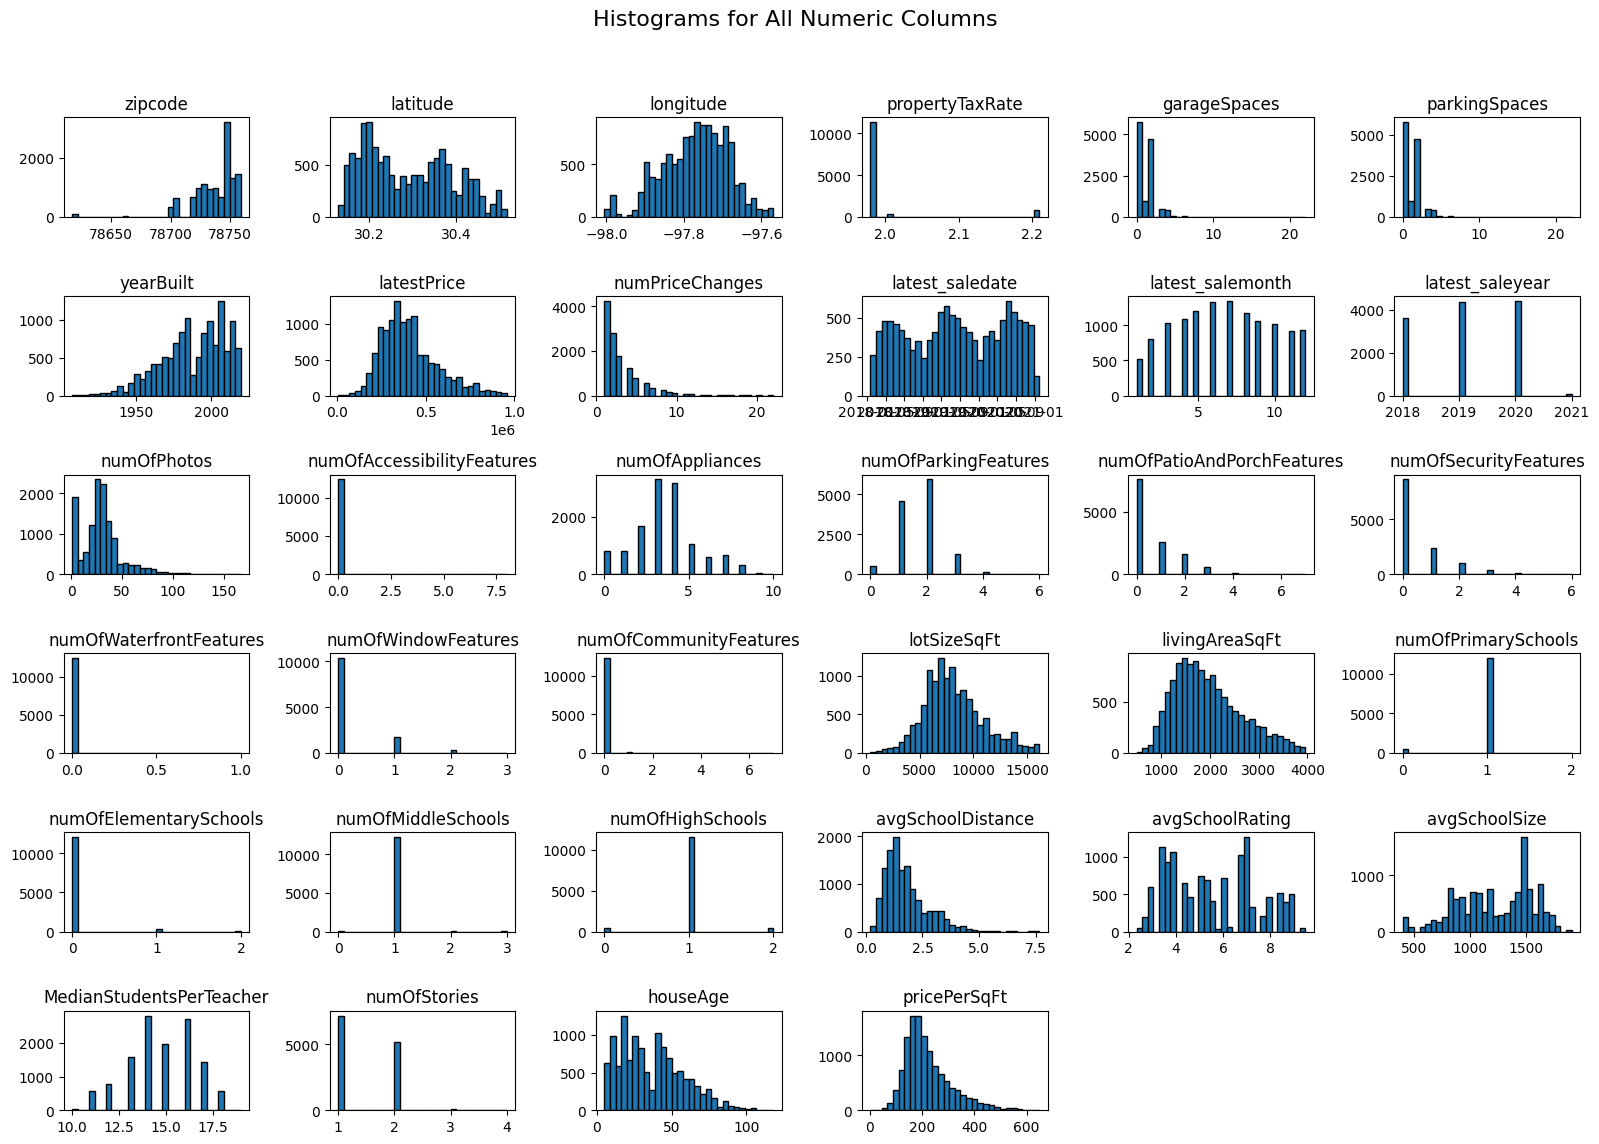

In [16]:
# 1.1) Histograms and histogram variants

import matplotlib.pyplot as plt

# Quick histograms for all numeric columns
df_cleaned.hist(figsize=(16, 12), bins=30, edgecolor='black', grid=False)
plt.suptitle('Histograms for All Numeric Columns', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


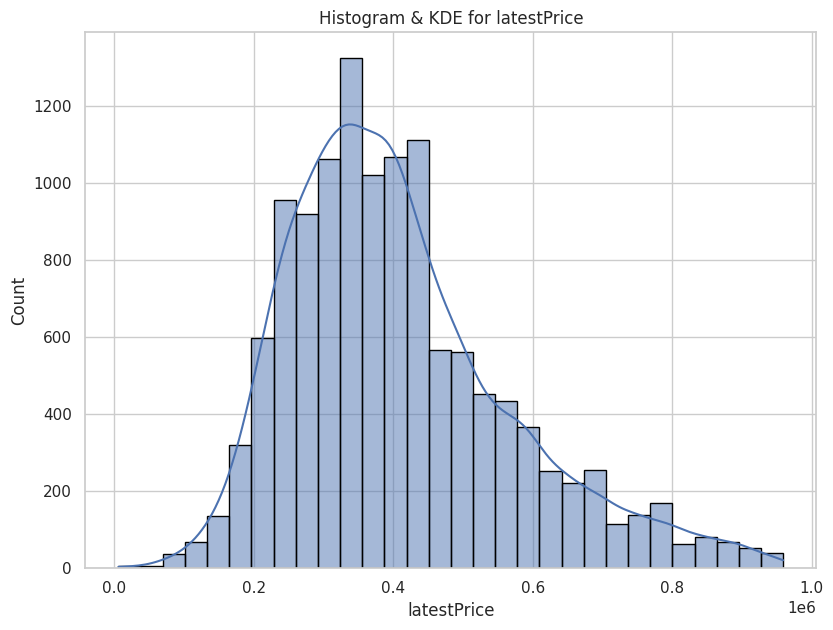

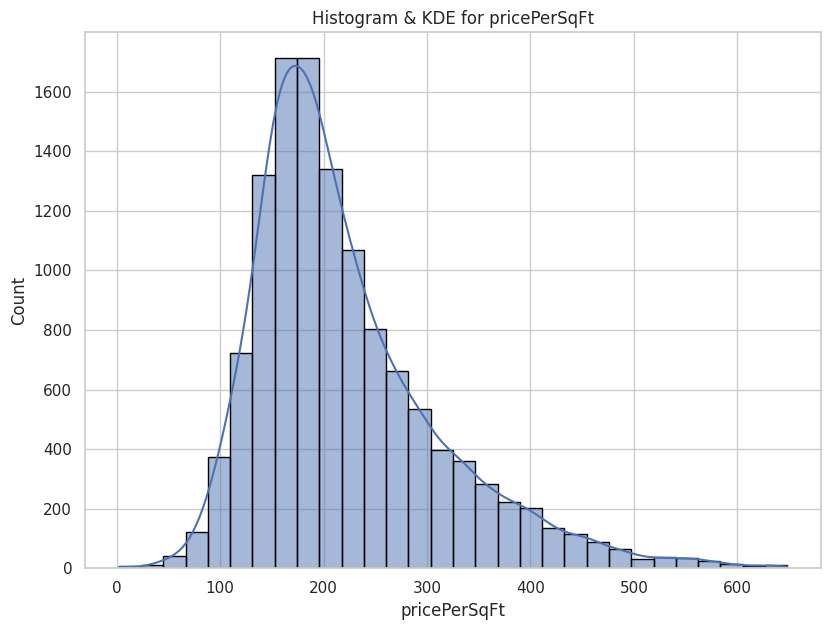

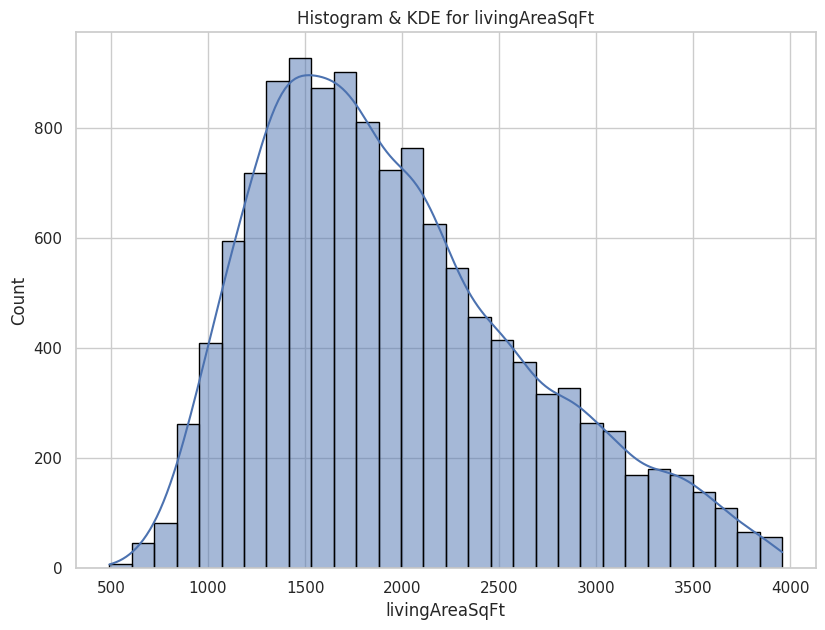

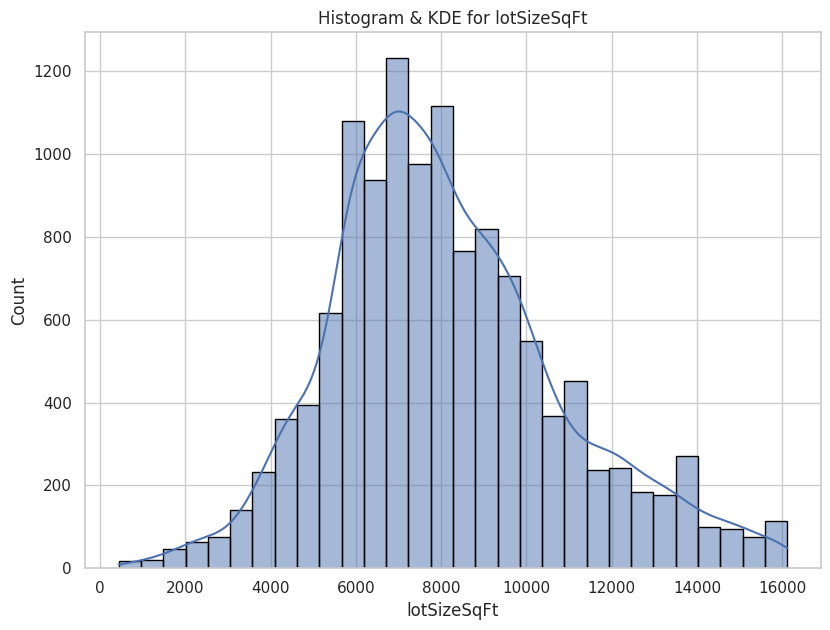

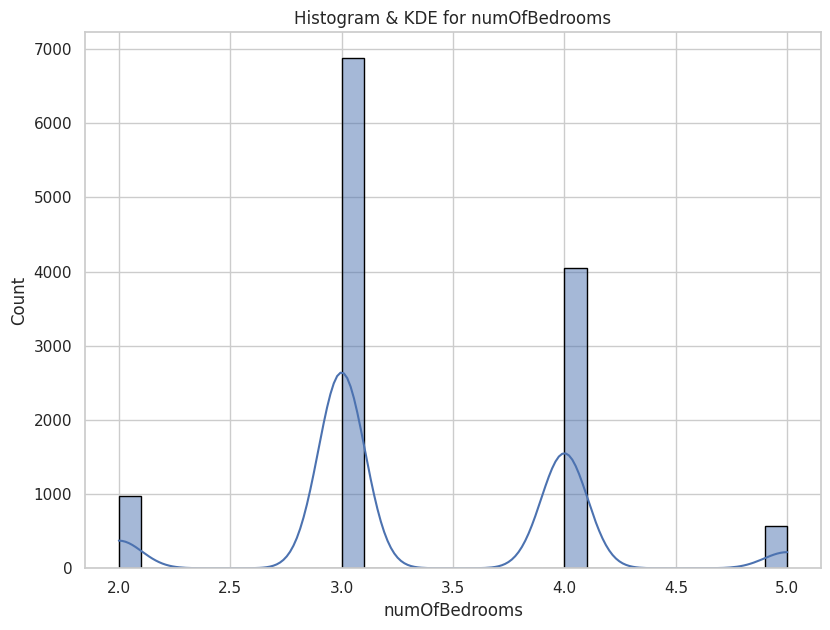

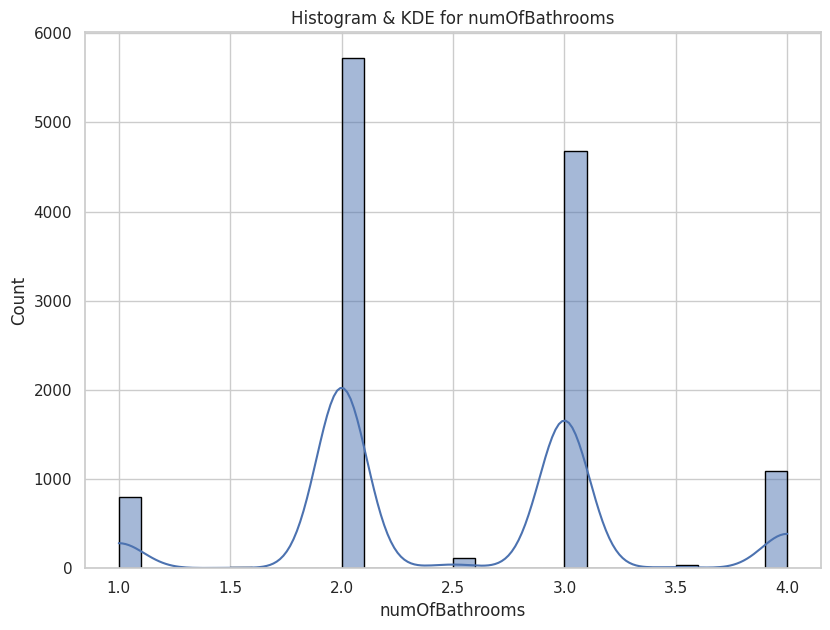

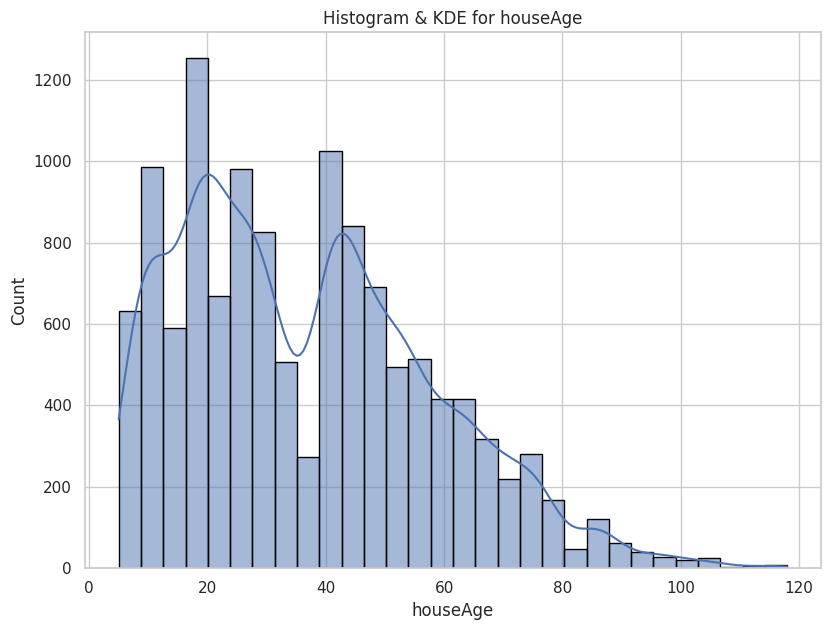

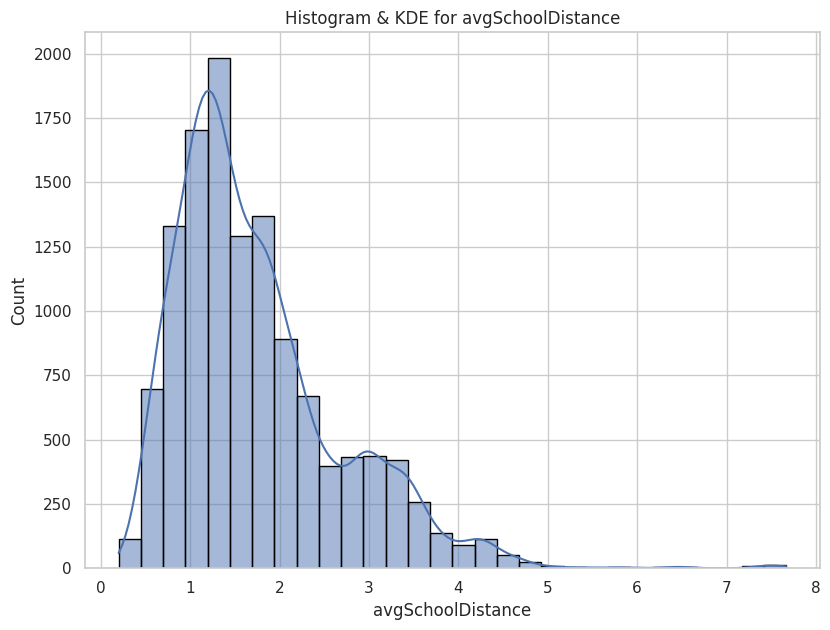

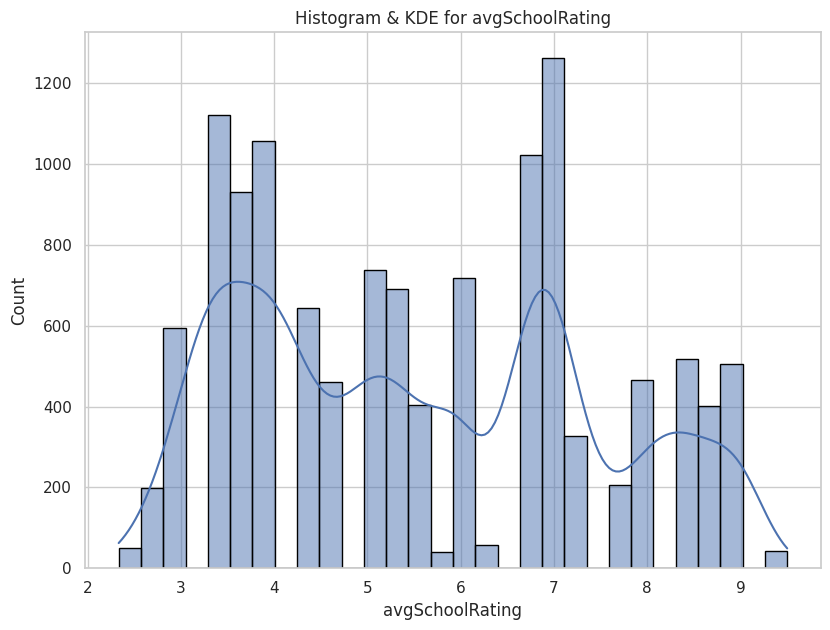

In [17]:
# 1.2) Histograms and Histogram Variants
import seaborn as sns

# Relevant columns for visualization
relevant_columns = ['latestPrice', 'pricePerSqFt', 'livingAreaSqFt', 'lotSizeSqFt',
                    'numOfBedrooms', 'numOfBathrooms', 'houseAge', 
                    'avgSchoolDistance', 'avgSchoolRating']

# Set plot style
sns.set(style="whitegrid")

# Iterate through selected columns
for col in relevant_columns:
    plt.figure(figsize=(16, 12))
    
    # ---------------------------- #
    # Histogram with KDE (Enabled) #
    # ---------------------------- #
    plt.subplot(2, 2, 1)
    sns.histplot(df_cleaned[col], bins=30, kde=True, edgecolor='black')
    plt.title(f'Histogram & KDE for {col}')
    
    
    # ------------------------------------- #
    # Violin Plot (Commented out for speed) #
    # ------------------------------------- #
    # plt.subplot(2, 2, 2)
    # sns.violinplot(x=df_cleaned[col])
    # plt.title(f'Violin Plot for {col}')
    
    # ---------------------------------- #
    # KDE Plot Alone (Commented out)    #
    # ---------------------------------- #
    # plt.subplot(2, 2, 3)
    # sns.kdeplot(df_cleaned[col], shade=True)
    # plt.title(f'KDE Plot for {col}')
    
    # --------------------------------------------- #
    # Swarm Plot (Skipped for continuous features) #
    # --------------------------------------------- #
    # plt.subplot(2, 2, 4)
    # if df_cleaned[col].nunique() < 50:  # Avoid clutter for high-cardinality data
    #     sns.swarmplot(x=col, data=df_clean)
    #     plt.title(f'Swarm Plot for {col}')
    # else:
    #     plt.text(0.5, 0.5, 'Swarm Plot skipped (too many unique values).',
    #              horizontalalignment='center', verticalalignment='center', fontsize=12)
    #     plt.title(f'Swarm Plot for {col}')
    
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


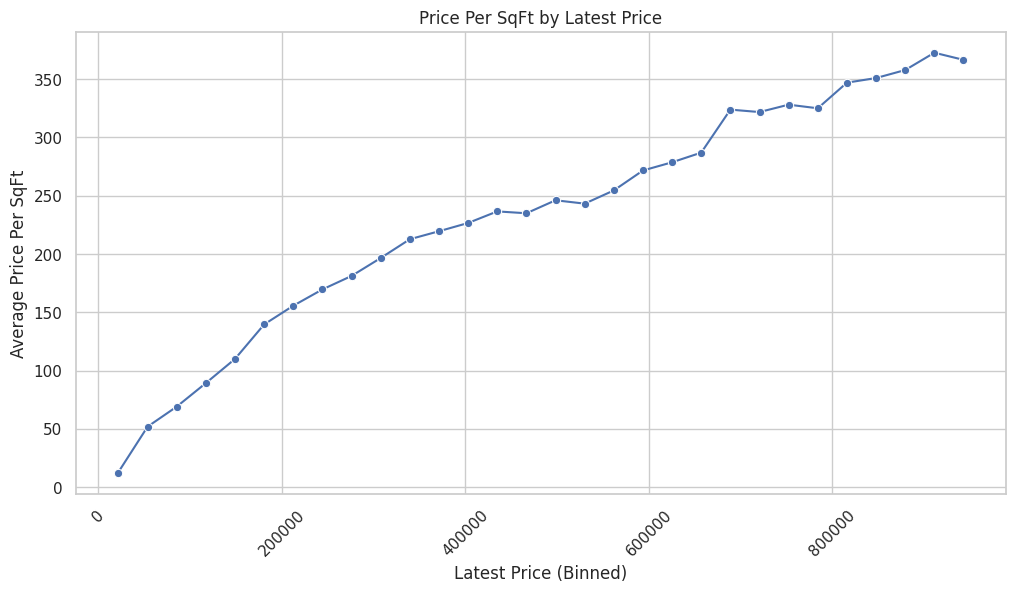

/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


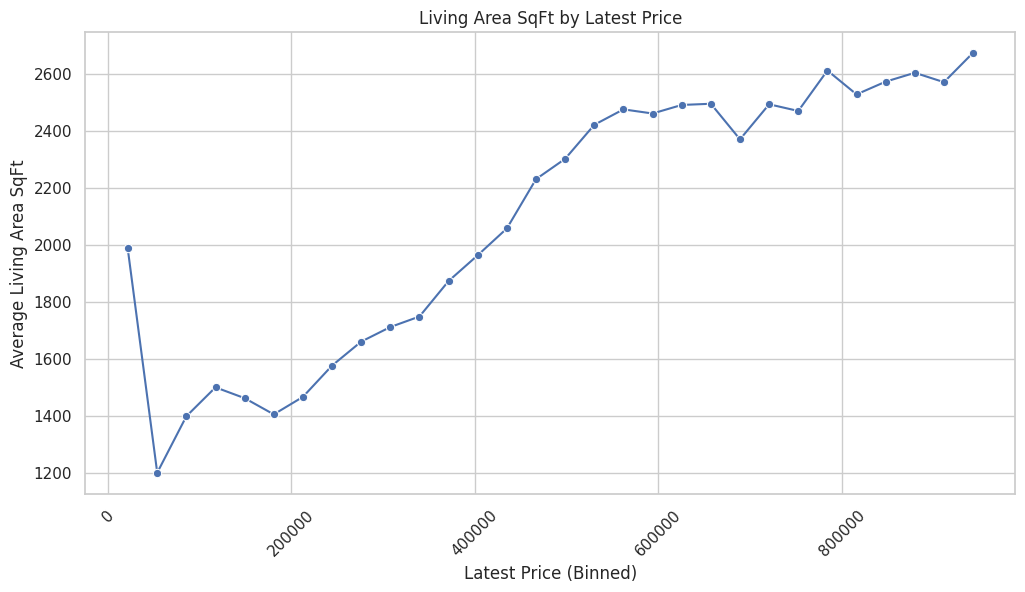

/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


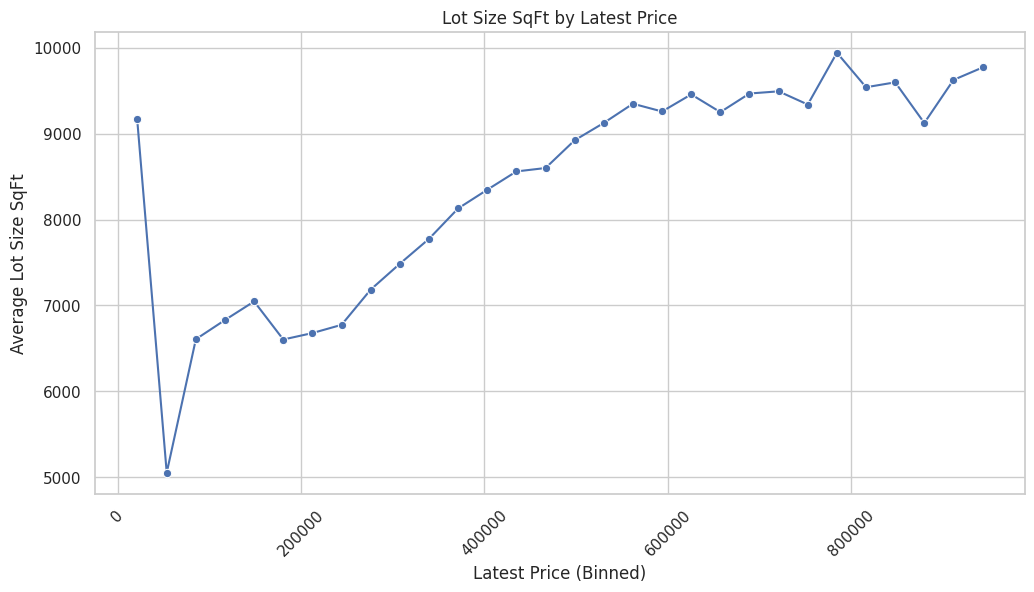

/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


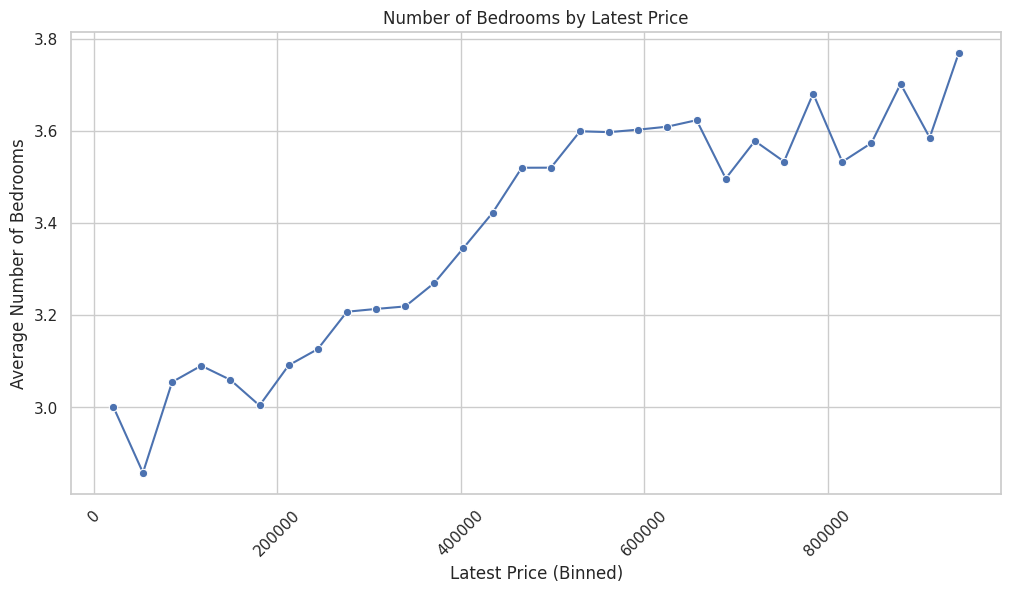

/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


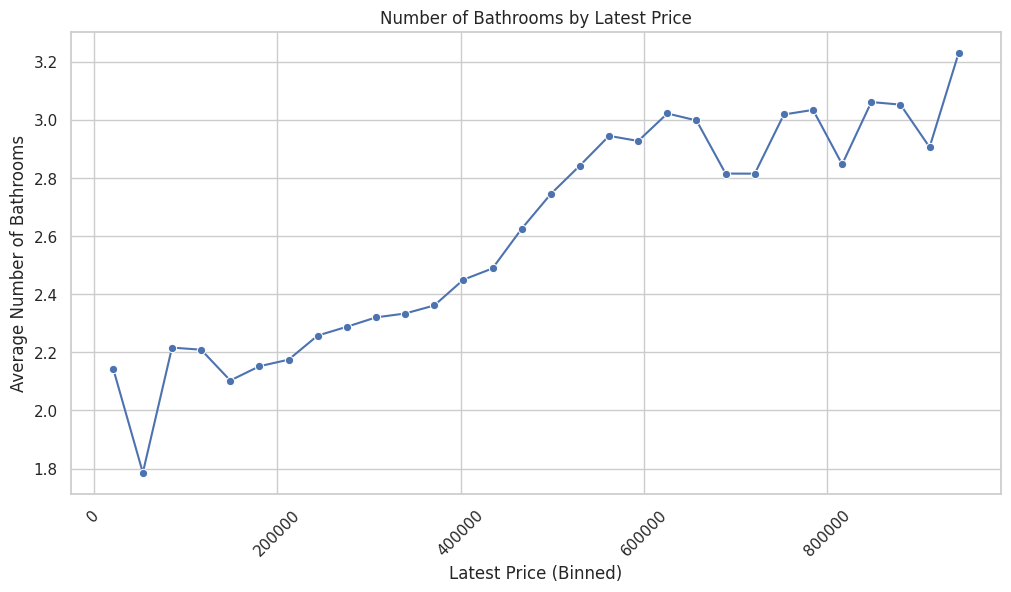

/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


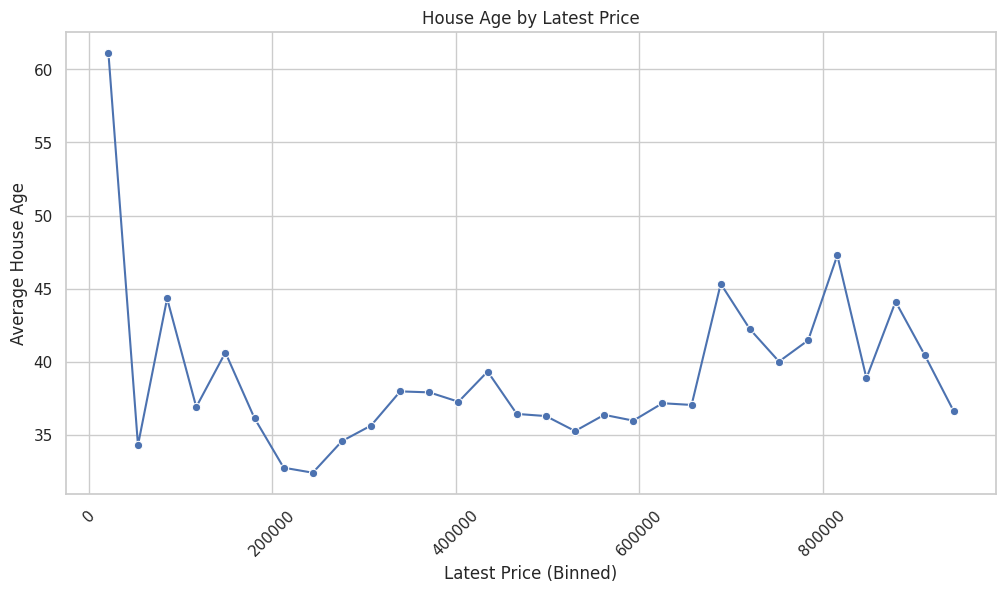

/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


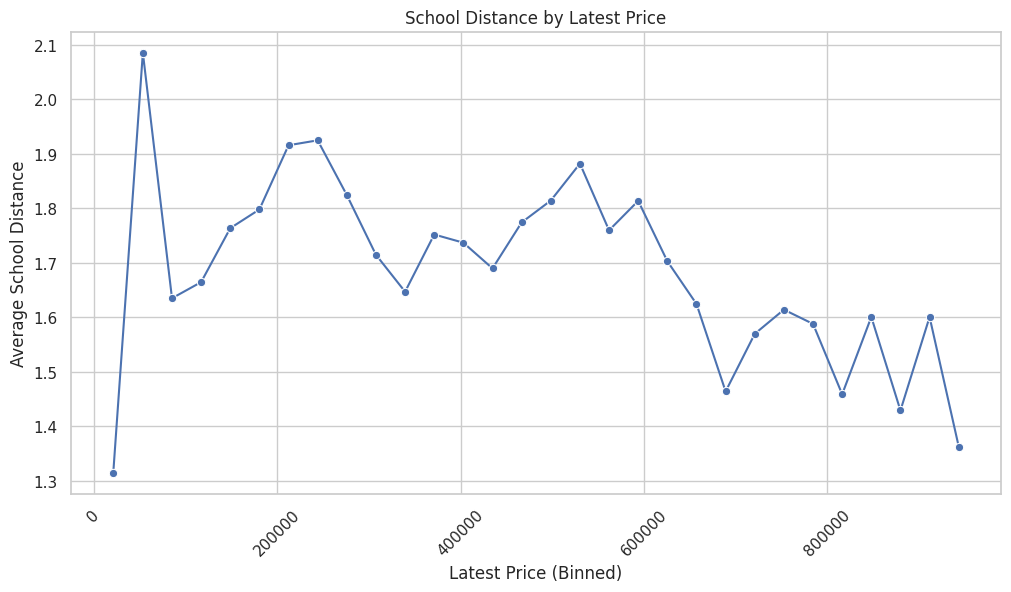

/tmp/ipykernel_9459/3181067364.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()


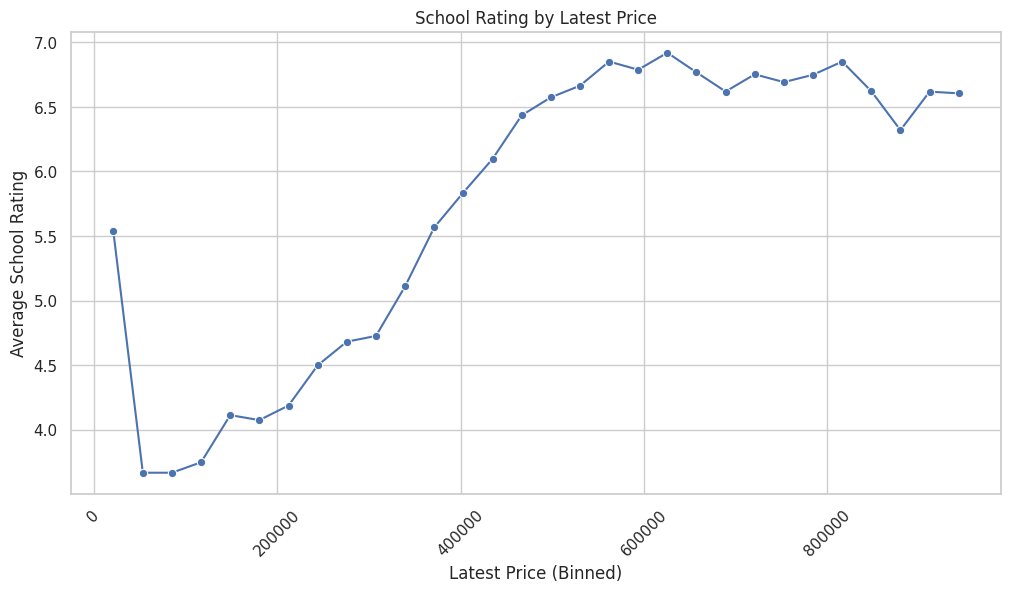

In [18]:
# 2. House price vs. interesting metric (such as School rating, lot Size, etc.)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Define bins for latestPrice
price_bins = pd.cut(df_cleaned['latestPrice'], bins=30)

# Define columns to plot against latestPrice
columns_to_plot = ['pricePerSqFt', 'livingAreaSqFt', 'lotSizeSqFt',
                   'numOfBedrooms', 'numOfBathrooms', 'houseAge',
                   'avgSchoolDistance', 'avgSchoolRating']

# Titles for the plots
titles = ['Price Per SqFt', 'Living Area SqFt', 'Lot Size SqFt',
          'Number of Bedrooms', 'Number of Bathrooms', 'House Age',
          'School Distance', 'School Rating']

# Create 8 line plots
for col, title in zip(columns_to_plot, titles):
    if col in df_cleaned.columns:
        # Group by latestPrice bins and calculate mean
        grouped_data = df_cleaned.groupby(price_bins)[col].mean().reset_index()

        # Extract bin midpoints for plotting
        bin_midpoints = grouped_data['latestPrice'].apply(lambda x: x.mid)

        # Plot
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=bin_midpoints, y=grouped_data[col], marker='o')
        plt.title(f'{title} by Latest Price')
        plt.xlabel('Latest Price (Binned)')
        plt.ylabel(f'Average {title}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{col}' not found in df_cleaned")



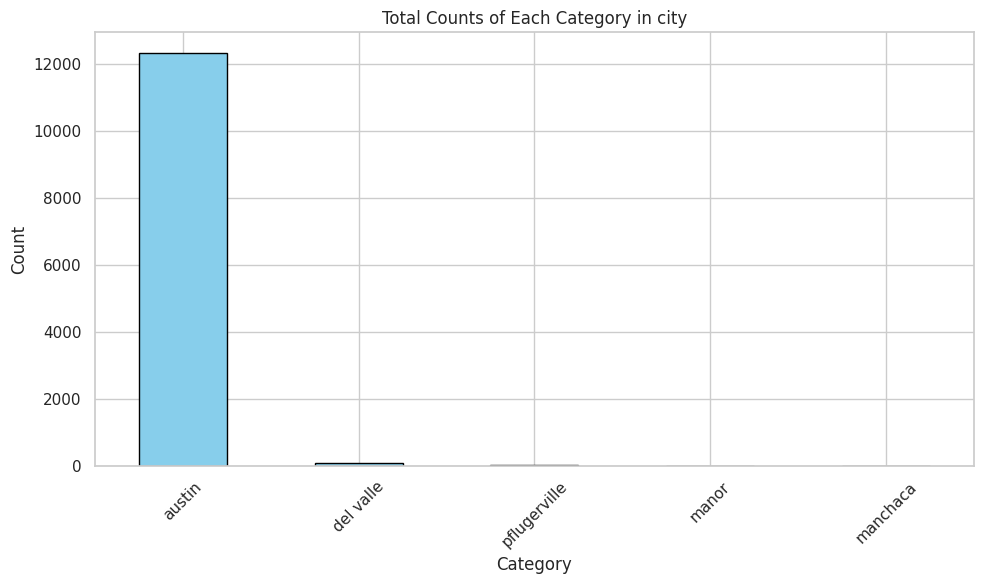

In [19]:
# 3. Draw a bar plot to indicate total counts of each categorical variable in a given column.

# Just replace 'your_categorical_column' with the actual column name; I took 'city' for now.
categorical_column = 'city'

# Count the occurrences of each category
category_counts = df_cleaned[categorical_column].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Total Counts of Each Category in {categorical_column}')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# 4. Find means, medians, and modes.

# Basic describe
summary = df_cleaned.describe(include='all')

# Adding mode for each column
modes = df_cleaned.mode().iloc[0]  # Taking the first mode if multiple exist
summary.loc['mode'] = modes

# Display the full summary
print(summary)


          city             streetAddress       zipcode      latitude  \
count    12461                     12461  12461.000000  12461.000000   
unique       5                     12457           NaN           NaN   
top     austin  5712 William Holland Ave           NaN           NaN   
freq     12334                         2           NaN           NaN   
mean       NaN                       NaN  78737.110505     30.290198   
min        NaN                       NaN  78617.000000     30.129505   
25%        NaN                       NaN  78727.000000     30.199373   
50%        NaN                       NaN  78744.000000     30.278904   
75%        NaN                       NaN  78749.000000     30.370041   
max        NaN                       NaN  78759.000000     30.517323   
std        NaN                       NaN     18.840636      0.099766   
mode    austin        10816 Mickelson Dr  78748.000000     30.179701   

           longitude  propertyTaxRate  garageSpaces hasAssociat

### My conclusions:

### Are the data what one expects? Are they usable?
The data align with expectations for a real estate dataset—broad coverage, a solid number of observations, and a good variety of features. The initial histograms showed some extreme outliers (e.g., unusually large lot sizes and extremely high prices), but these have been filtered out in the analysis to ensure cleaner insights. With the outliers managed, the data is definitely usable for deeper analysis.

### What is the overall shape of the distribution?
The distributions are largely **right-skewed**. Variables like *latest price*, *lot size*, and *living area* show longer right tails, which is typical in real estate markets where high-end properties stretch the upper end. *Number of bedrooms* and *bathrooms* cluster around common values (3-4 bedrooms, 2-3 bathrooms) but still show mild skewness. The *year built* distribution reflects housing growth trends over time, with newer homes dominating.

### Are there any outliers present?
Yes, there were clear outliers in the initial histograms, especially in lot size (up to 1.5 billion sqft), price (up to $13.5M), and living area (over 100,000 sqft). However, these have already been filtered out for this analysis to prevent them from skewing the visualizations and summary statistics.

### How does the distribution change across different groups?
The line graphs reveal insightful trends:
- **Price per SqFt** steadily increases with *latest price*, indicating that more expensive homes often command higher rates per square foot.
- **Living area** and **lot size** generally grow with price, but the rate of increase tapers at higher price points.
- **Number of bedrooms and bathrooms** slightly increases with higher prices, though not as drastically as lot size or living area.
- **House age** tends to decrease with price—newer homes are generally more expensive.
- **School factors** show logical trends:
  - **Average school distance** decreases with higher housing prices—buyers pay premiums for proximity to schools.
  - **Average school rating** increases alongside home prices, showing that better-rated schools correlate with more expensive properties.

### What are the minimum and maximum values represented in each histogram?
- **Latest Price:** $5,500 to $13.5M  
- **Lot Size (SqFt):** 100 to 1.5B sqft  
- **Living Area (SqFt):** 300 to 109,292 sqft  
- **Number of Bathrooms:** 0 to 27  
- **Number of Bedrooms:** 0 to 20  
- **Year Built:** 1905 to 2020

### How do bin sizes affect the histogram?
Adjusting bin sizes alters the granularity of the histograms:
- **Narrow bins** highlight subtle peaks and outliers but can make patterns less clear.
- **Wider bins** smooth the data, helping to reveal overall trends but may obscure finer details.

### Does the distribution appear normal or follow another shape?
None of the distributions follow a **normal distribution**. Most are **right-skewed**, especially price-related variables. *Year built* displays a more **bimodal** pattern, reflecting different construction booms, while features like *number of bedrooms* cluster tightly around 3-4.

### Additional Insights from Line Graphs
The line graphs reinforce logical expectations:
- **Higher school ratings** correlate with higher housing prices.
- **Shorter distances to schools** also push prices up, reflecting common buyer preferences.
- As expected, **larger homes** and **bigger lots** lead to higher prices, but the price per square foot also rises—suggesting not just size but quality or location also plays a role.

Overall, the data is clean (post-outlier filtering) and supports intuitive, real-world relationships. It’s ready for deeper modeling or predictive analytics.


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

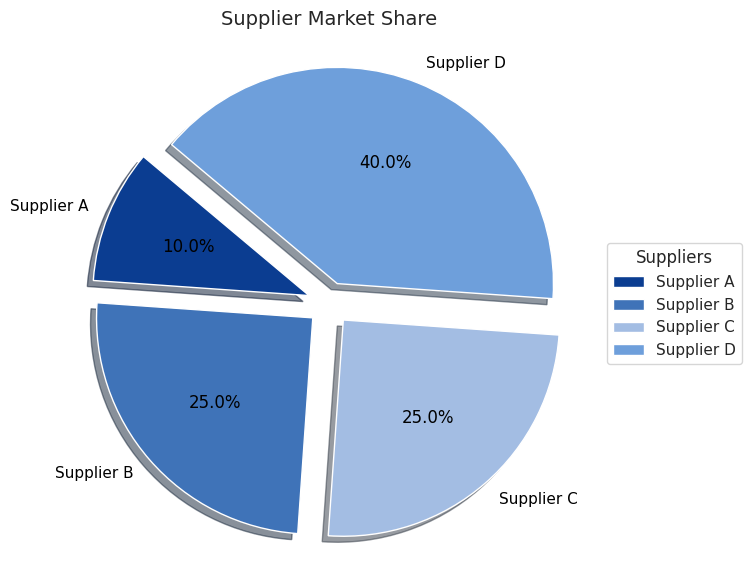

In [21]:
# I've decided to do a pie chart this week.

# Data for the pie chart
labels = ['Supplier A', 'Supplier B', 'Supplier C', 'Supplier D']
sizes = [10, 25, 25, 40]  # Example market shares
colors = ['#0B3D91', '#3F73B8', '#A3BDE3', '#6E9FDB']  # Custom colors
explode = (0.1, 0.1, 0.1, 0.1)  # To separate each slice

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                  autopct='%1.1f%%', startangle=140, shadow=True, textprops=dict(color="black"))

# Title
ax.set_title('Supplier Market Share', fontsize=14)

# Legend placed outside the pie chart
ax.legend(wedges, labels, title="Suppliers", loc="center left", bbox_to_anchor=(1, 0.5))

# Adjust layout to fit legend properly
plt.tight_layout()

# Show plot
plt.show()

